<a href="https://colab.research.google.com/github/Badhrinath123/mask-detection/blob/main/22STUCHH010167(Face_Mask_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install opencv-python tensorflow keras numpy matplotlib

In [7]:
from google.colab import files
uploaded = files.upload()  # upload zipped dataset here

import zipfile
import os

with zipfile.ZipFile("/content/archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall("mask_dataset")


Saving archive (5).zip to archive (5).zip


In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/mask_dataset/data',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

val_data = datagen.flow_from_directory(
    '/content/mask_dataset/data',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=val_data, epochs=10)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 111s 578ms/step - accuracy: 0.7744 - loss: 0.5404 - val_accuracy: 0.9073 - val_loss: 0.2388
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 108s 569ms/step - accuracy: 0.9070 - loss: 0.2348 - val_accuracy: 0.9086 - val_loss: 0.2415
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 109s 576ms/step - accuracy: 0.9212 - loss: 0.1915 - val_accuracy: 0.9179 - val_loss: 0.2124
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 106s 562ms/step - accuracy: 0.9513 - loss: 0.1428 - val_accuracy: 0.9132 - val_loss: 0.2429
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 111s 586ms/step - accuracy: 0.9576 - loss: 0.1075 - val_accuracy: 0.9397 - val_loss: 0.1932
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 109s 576ms/step - accuracy: 0.9667 - loss: 0.0895 - val_accuracy: 0.9444 - val_loss: 0.1901
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 109s 576ms/step - accuracy: 0.9798 - loss: 0.0599 - val_accuracy: 0.9298 - val_loss: 0.2379
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 106s 563ms/step - accuracy: 0.9918 - loss: 0.02

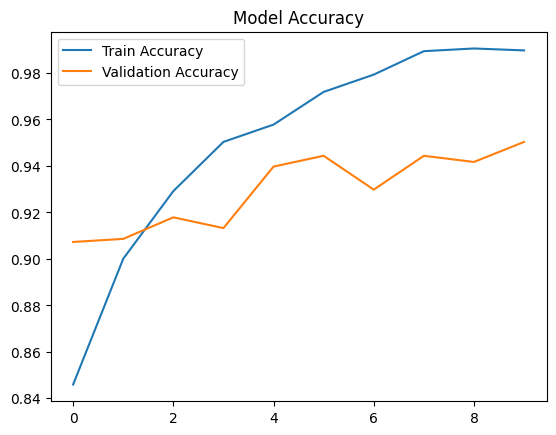

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


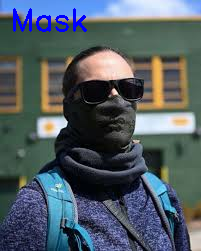

In [34]:
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

img_path = '/content/with_mask_2.jpg'  # Example test image
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]
label = "Mask" if pred < 0.5 else "No Mask"

# Display image and prediction
orig = cv2.imread(img_path)
cv2.putText(orig, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
cv2_imshow(orig)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


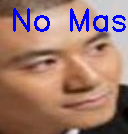

In [35]:
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

img_path = '/content/without_mask_7.jpg'  # Example test image
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]
label = "Mask" if pred < 0.5 else "No Mask"

# Display image and prediction
orig = cv2.imread(img_path)
cv2.putText(orig, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
cv2_imshow(orig)
